In [1324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('Wholesale Customer.csv')
%matplotlib inline


In [1325]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


### 1.1. Use methods of descriptive statistics to summarize data.
Which Region and which Channel seems to spend more?
Which Region and which Channel seems to spend less?

In [1326]:
x=df.groupby(['Region']).sum()

In [1327]:
print(x) # Prints the sum of expenditure in each channel

        Buyer/Spender    Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region                                                                       
Lisbon          18095   854833   422454   570037  231026            204136   
Oporto          14899   464721   239144   433274  190132            173311   
Other           64026  3960577  1888759  2495251  930492            890410   

        Delicatessen  
Region                
Lisbon        104327  
Oporto         54506  
Other         512110  


In [1333]:
print(x.max())# Get max value of expenditure
print("\n\n")
print(x.min()) # Get min value of expenditure

Buyer/Spender            64026
Fresh                  3960577
Milk                   1888759
Grocery                2495251
Frozen                  930492
Detergents_Paper        890410
Delicatessen            512110
sum_of_expenditure    10741625
dtype: int64



Buyer/Spender           14899
Fresh                  464721
Milk                   239144
Grocery                433274
Frozen                 190132
Detergents_Paper       173311
Delicatessen            54506
sum_of_expenditure    1569987
dtype: int64


In [1334]:
x["sum_of_expenditure"]=x[x.columns[0]]+x[x.columns[1]]+x[x.columns[2]]+x[x.columns[3]]+x[x.columns[4]]+x[x.columns[5]]+x[x.columns[6]]

print(x)

        Buyer/Spender    Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region                                                                       
Lisbon          18095   854833   422454   570037  231026            204136   
Oporto          14899   464721   239144   433274  190132            173311   
Other           64026  3960577  1888759  2495251  930492            890410   

        Delicatessen  sum_of_expenditure  
Region                                    
Lisbon        104327             2404908  
Oporto         54506             1569987  
Other         512110            10741625  


In [1330]:
print("\n")
amax=x[x['sum_of_expenditure']==x['sum_of_expenditure'].max()]
print("The Region with maximum expenditure is :" ,amax.reset_index()['Region'][0])
print("\n")
amin=x[x['sum_of_expenditure']==x['sum_of_expenditure'].min()]
print("The Region with minimum expenditure is :" ,amin.reset_index()['Region'][0])
print("\n")




The Region with maximum expenditure is : Other


The Region with minimum expenditure is : Oporto




In [1378]:

y=df.groupby(['Channel']).sum()
y["sum_of_expenditure"]=y[y.columns[0]]+y[y.columns[1]]+y[y.columns[2]]+y[y.columns[3]]+y[y.columns[4]]+y[y.columns[5]]+y[y.columns[6]]
print("\n")

print(y)



         Buyer/Spender    Fresh     Milk  Grocery   Frozen  Detergents_Paper  \
Channel                                                                        
Hotel            71034  4015717  1028614  1180717  1116979            235587   
Retail           25986  1264414  1521743  2317845   234671           1032270   

         Delicatessen  sum_of_expenditure  
Channel                                    
Hotel          421955             8070603  
Retail         248988             6645917  


In [1379]:
amax=y[y['sum_of_expenditure']==y['sum_of_expenditure'].max()]
print("The Channel with maximum expenditure is :" ,amax.reset_index()['Channel'][0])
print("\n")
amin=y[y['sum_of_expenditure']==y['sum_of_expenditure'].min()]
print("The Channel with minimum expenditure is :" ,amin.reset_index()['Channel'][0])
print("\n")

The Channel with maximum expenditure is : Hotel


The Channel with minimum expenditure is : Retail




### 1.2. There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

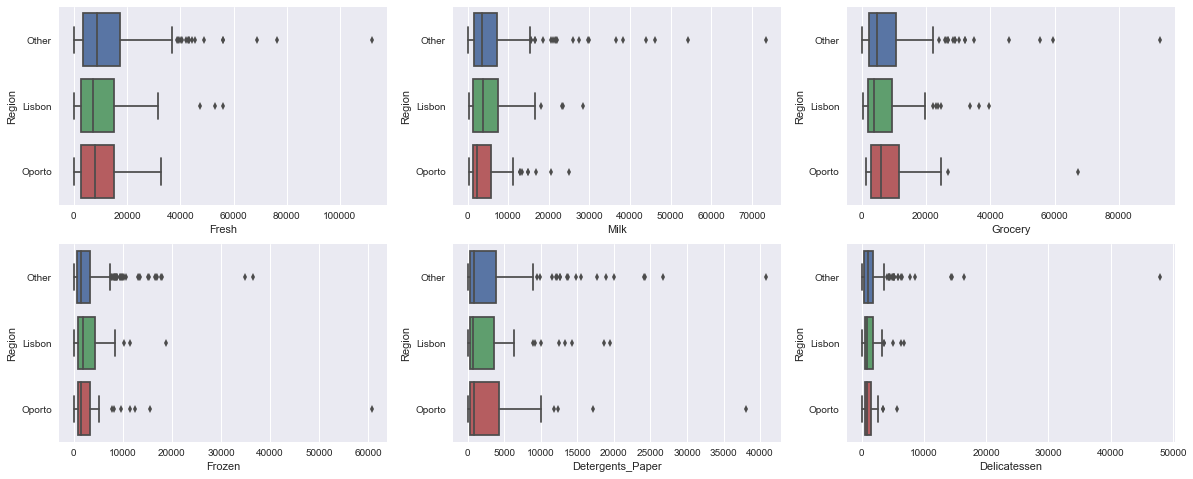

In [1380]:
fig, axes = plt.subplots(2,3,figsize=(20,8))
#fig_dims = (10, 20)
#fig, axes = plt.subplots(figsize=fig_dims)
sns.boxplot(df['Fresh'],df['Region'],ax=axes[0, 0])
sns.boxplot(df['Milk'],df['Region'],ax=axes[0, 1])
sns.boxplot((df['Grocery']),df['Region'],ax=axes[0, 2])
sns.boxplot(df['Frozen'],df['Region'],ax=axes[1,0])
sns.boxplot(df['Detergents_Paper'],df['Region'],ax=axes[1, 1])
sns.boxplot(df['Delicatessen'],df['Region'],ax=axes[1, 2])

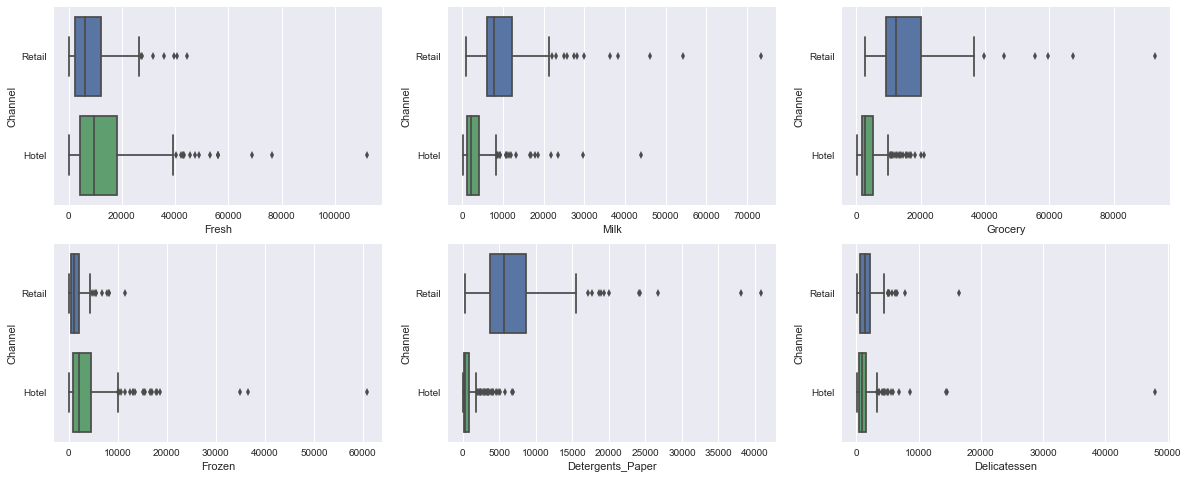

In [1381]:
fig, axes = plt.subplots(2,3,figsize=(20,8))
#fig_dims = (10, 20)
#fig, axes = plt.subplots(figsize=fig_dims)
sns.boxplot(df['Fresh'],df['Channel'],ax=axes[0, 0])
sns.boxplot(df['Milk'],df['Channel'],ax=axes[0, 1])
sns.boxplot((df['Grocery']),df['Channel'],ax=axes[0, 2])
sns.boxplot(df['Frozen'],df['Channel'],ax=axes[1,0])
sns.boxplot(df['Detergents_Paper'],df['Channel'],ax=axes[1, 1])
sns.boxplot(df['Delicatessen'],df['Channel'],ax=axes[1, 2])

# 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
Which items shows the least inconsistent behaviour?

In [1386]:
heads=df.columns[3:]; heads
cv.keys()
cv.values()

dict_values([1.0539179237473149, 1.2732985840065414, 1.1951743730016824, 1.5803323836352914, 1.6546471385005155, 1.8494068981158382])

In [1393]:
import pprint
heads=df.columns[3:]
cv={}
for i in heads:
  cv[i]=df[i].std()/df[i].mean()
print("Coefficient of Variation values are \n\n",pprint.pformat(cv)) # plotting coefficient of variation values
cv_max = max(cv.keys(), key=(lambda k: cv[k]))
print("\n\n The coefficient of variation of the ",cv_max,"category is the highest with a value of :",cv[cv_max]," \n and therefore exhibits most inconsitent behavior")

Coefficient of Variation values are 

 {'Delicatessen': 1.8494068981158382,
 'Detergents_Paper': 1.6546471385005155,
 'Fresh': 1.0539179237473149,
 'Frozen': 1.5803323836352914,
 'Grocery': 1.1951743730016824,
 'Milk': 1.2732985840065414}


 The coefficient of variation of the  Delicatessen category is the highest with a value of : 1.8494068981158382  
 and therefore exhibits most inconsitent behavior


### 1.4. Are there any outliers in the data?



  

 There are outliers in all the variables as seen in boxplot below  




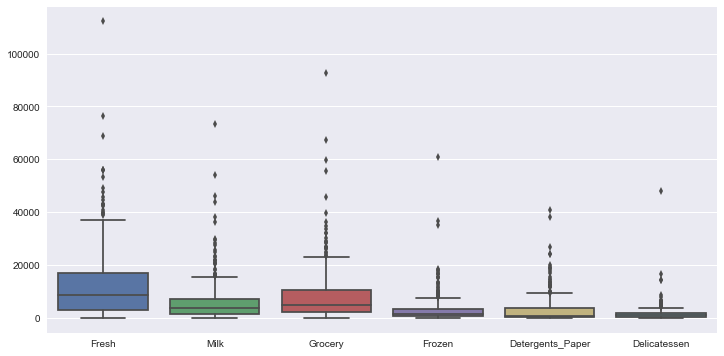

In [1106]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data=df.iloc[:,3:9])
print(" \033[1m \n\n There are outliers in all the variables as seen in boxplot below \033[0m \n\n")

# Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey.csv file).

In [1416]:
df_csmu=pd.read_csv('Survey-1.csv')


In [1417]:
df_csmu.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [1418]:
colz=df_csmu['Major'].unique() # Get column headings (majors in this case)

In [1419]:
rowz=df_csmu['Gender'].unique() # Get rows indices i.e. male & female

In [1420]:
contigency_tab1=pd.DataFrame(np.random.randn(rowz.size,colz.size),columns=colz,index=rowz) # Create format of Contigency table, populate with random numbers


In [1421]:
rindex=0
cindex=0
for i in rowz:
    for j in colz:
        contigency_tab1.iloc[rindex,cindex]=df_csmu[(df_csmu['Gender']==i) & (df_csmu['Major']==j)].count()[0]
        cindex=cindex+1
    rindex=rindex+1
    cindex=0

In [1422]:
contigency_tab1

,Other,Management,CIS,Economics/Finance,Undecided,International Business,Retailing/Marketing,Accounting
Female,3.0,4.0,3.0,7.0,0.0,4.0,9.0,3.0
Male,4.0,6.0,1.0,4.0,3.0,2.0,5.0,4.0


In [1423]:
contigency_tab1["Total"]=contigency_tab1['Other']+contigency_tab1['Management']+contigency_tab1['CIS']+contigency_tab1['Economics/Finance']+contigency_tab1['Undecided']+contigency_tab1['International Business']+contigency_tab1['Retailing/Marketing']+contigency_tab1['Accounting']
contigency_tab1

,Other,Management,CIS,Economics/Finance,Undecided,International Business,Retailing/Marketing,Accounting,Total
Female,3.0,4.0,3.0,7.0,0.0,4.0,9.0,3.0,33.0
Male,4.0,6.0,1.0,4.0,3.0,2.0,5.0,4.0,29.0


In [1426]:
contigency_tab1
col=contigency_tab1.columns
k=0
ser=[]
for i in col:
    ser.append(contigency_tab1[i][0]+contigency_tab1[i][1])
contigency_tab1.loc["m_f_tot"]=ser
contigency_tab1

,Other,Management,CIS,Economics/Finance,Undecided,International Business,Retailing/Marketing,Accounting,Total
Female,3.0,4.0,3.0,7.0,0.0,4.0,9.0,3.0,33.0
Male,4.0,6.0,1.0,4.0,3.0,2.0,5.0,4.0,29.0
m_f_tot,7.0,10.0,4.0,11.0,3.0,6.0,14.0,7.0,62.0


In [1415]:
rowcrit='Grad Intention'
colcrit='Gender'
colz=df_csmu[rowcrit].unique() # Get column headings (majors in this case)
rowz=df_csmu[colcrit].unique() # Get rows indices i.e. male & female

contigency_tab2=pd.DataFrame(np.random.randn(rows.size,colz.size),columns=colz,index=rowz) # Create format of Contigency table, populate with random numbers

rindex=0
cindex=0

for i in rowz:
    for j in colz:
        contigency_tab2.iloc[rindex,cindex]=df_csmu[(df_csmu[colcrit]==i) & (df_csmu[rowcrit]==j)].count()[0] # Get values with inersection of row and column criteria
        cindex=cindex+1
    rindex=rindex+1
    cindex=0

In [1431]:
contigency_tab2["Total"]=contigency_tab2['Yes']+contigency_tab2['Undecided']+contigency_tab2['No']
col=contigency_tab2.columns
k=0
ser=[]
for i in col:
    ser.append(contigency_tab2[i][0]+contigency_tab2[i][1])
contigency_tab2.loc["m_f_tot"]=ser
contigency_tab2

,Yes,Undecided,No,Total
Female,11.0,13.0,9.0,33.0
Male,17.0,9.0,3.0,29.0
m_f_tot,28.0,22.0,12.0,62.0


In [1432]:
rowcrit='Employment'
colcrit='Gender'
colz=df_csmu[rowcrit].unique() # Get column headings (majors in this case)
rowz=df_csmu[colcrit].unique() # Get rows indices i.e. male & female

contigency_tab3=pd.DataFrame(np.random.randn(rows.size,colz.size),columns=colz,index=rowz) # Create format of Contigency table, populate with random numbers

rindex=0
cindex=0

for i in rowz:
    for j in colz:
        contigency_tab3.iloc[rindex,cindex]=df_csmu[(df_csmu[colcrit]==i) & (df_csmu[rowcrit]==j)].count()[0] # Get values with inersection of row and column criteria
        cindex=cindex+1
    rindex=rindex+1
    cindex=0
contigency_tab3["Total"]=contigency_tab3['Full-Time']+contigency_tab3['Part-Time']+contigency_tab3['Unemployed']
col=contigency_tab3.columns
k=0
ser=[]
for i in col:
    ser.append(contigency_tab3[i][0]+contigency_tab3[i][1])
contigency_tab3.loc["m_f_tot"]=ser
contigency_tab3

,Full-Time,Part-Time,Unemployed,Total
Female,3.0,24.0,6.0,33.0
Male,7.0,19.0,3.0,29.0
m_f_tot,10.0,43.0,9.0,62.0


In [1117]:
contigency_tab3

,Full-Time,Part-Time,Unemployed
Female,3.0,24.0,6.0
Male,7.0,19.0,3.0


In [1433]:
rowcrit='Computer'
colcrit='Gender'
colz=df_csmu[rowcrit].unique() # Get column headings (majors in this case)
rowz=df_csmu[colcrit].unique() # Get rows indices i.e. male & female

contigency_tab4=pd.DataFrame(np.random.randn(rows.size,colz.size),columns=colz,index=rowz) # Create format of Contigency table, populate with random numbers

rindex=0
cindex=0

for i in rowz:
    for j in colz:
        contigency_tab4.iloc[rindex,cindex]=df_csmu[(df_csmu[colcrit]==i) & (df_csmu[rowcrit]==j)].count()[0] # Get values with inersection of row and column criteria
        cindex=cindex+1
    rindex=rindex+1
    cindex=0
contigency_tab4["Total"]=contigency_tab4['Laptop']+contigency_tab4['Tablet']+contigency_tab4['Desktop']
col=contigency_tab4.columns
k=0
ser=[]
for i in col:
    ser.append(contigency_tab4[i][0]+contigency_tab4[i][1])
contigency_tab4.loc["m_f_tot"]=ser
contigency_tab4

,Laptop,Tablet,Desktop,Total
Female,29.0,2.0,2.0,33.0
Male,26.0,0.0,3.0,29.0
m_f_tot,55.0,2.0,5.0,62.0


# 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

# 2.2.1. What is the probability that a randomly selected CMSU student will be male?What is the probability that a randomly selected CMSU student will be female?

In [1120]:
total_student=df_csmu['Gender'].count()

In [1121]:
male_student=df_csmu[df_csmu['Gender']=="Male"].count()[0]


In [1122]:
prob_rand_male=male_student/total_student*100

In [1123]:
print("probability that a randomly selected CMSU student will be male :",prob_rand_male,'%')

probability that a randomly selected CMSU student will be male : 46.7741935484 %


In [1124]:
prob_rand_female=(total_student-male_student)/total_student*100

In [1125]:
print("probability that a randomly selected CMSU student will be male :",prob_rand_female,'%')

probability that a randomly selected CMSU student will be male : 53.2258064516 %


# 2.2.2. 
a) Find the conditional probability of different majors among the male students in CMSU.
b) Find the conditional probability of different majors among the female students of CMSU.

In [1466]:
contigency_tab1


,Other,Management,CIS,Economics/Finance,Undecided,International Business,Retailing/Marketing,Accounting,Total
Female,3.000000,4.000000,3.000000,7.000000,0.000000,4.000000,9.000000,3.000000,33.0
Male,4.000000,6.000000,1.000000,4.000000,3.000000,2.000000,5.000000,4.000000,29.0
m_f_tot,7.000000,10.000000,4.000000,11.000000,3.000000,6.000000,14.000000,7.000000,62.0
Cond_prob_maj_males,0.137931,0.206897,0.034483,0.137931,0.103448,0.068966,0.172414,0.137931,1.0
Cond_prob_maj_fem,0.090909,0.121212,0.090909,0.212121,0.000000,0.121212,0.272727,0.090909,1.0


In [1467]:
m_other=contigency_tab1.iloc[1,0]/contigency_tab1.iloc[1,8]

In [1468]:
col

Index(['Yes', 'Undecided', 'No', 'Total'], dtype='object')

In [1469]:
#"Cond_prob_maj_males"
ser=[]
col=contigency_tab1.columns
for i in col:
    ser.append(contigency_tab1[i][1]/contigency_tab1['Total'][1])
contigency_tab1.loc["Cond_prob_maj_males"]=ser
#"Cond_prob_maj_fem"
ser=[]
for i in col:
    ser.append(contigency_tab1[i][0]/contigency_tab1['Total'][0])
contigency_tab1.loc["Cond_prob_maj_fem"]=ser

In [1470]:
contigency_tab1.loc['Cond_prob_maj_males']

Other                     0.137931
Management                0.206897
CIS                       0.034483
Economics/Finance         0.137931
Undecided                 0.103448
International Business    0.068966
Retailing/Marketing       0.172414
Accounting                0.137931
Total                     1.000000
Name: Cond_prob_maj_males, dtype: float64

In [1471]:
contigency_tab1.loc['Cond_prob_maj_fem']

Other                     0.090909
Management                0.121212
CIS                       0.090909
Economics/Finance         0.212121
Undecided                 0.000000
International Business    0.121212
Retailing/Marketing       0.272727
Accounting                0.090909
Total                     1.000000
Name: Cond_prob_maj_fem, dtype: float64

In [1472]:
#"Intent to Graduate"
contigency_tab2['Total']=contigency_tab2['Yes']+contigency_tab2['No']+contigency_tab2['Undecided']
contigency_tab2

,Yes,Undecided,No,Total
Female,11.000000,13.000000,9.000000,33.0
Male,17.000000,9.000000,3.000000,29.0
m_f_tot,28.000000,22.000000,12.000000,62.0
Intent_grad_mal_prob,0.586207,0.310345,0.103448,1.0
Intent_grad_fem_prob,0.333333,0.393939,0.272727,1.0


In [1475]:
ser=[]
col=contigency_tab2.columns
for i in col:
    ser.append(contigency_tab2[i][0]+contigency_tab2[i][1])
   


In [1474]:
col

Index(['Yes', 'Undecided', 'No', 'Total'], dtype='object')

In [1451]:
serm=[]
serf=[]
col=contigency_tab2.columns
for i in col:
    serm.append(contigency_tab2[i][1]/contigency_tab2['Total'][1])
col=contigency_tab2.columns
for i in col:
    serf.append(contigency_tab2[i][0]/contigency_tab2['Total'][0])

In [1452]:
contigency_tab2

,Yes,Undecided,No,Total
Female,11.000000,13.000000,9.000000,33.0
Male,17.000000,9.000000,3.000000,29.0
m_f_tot,28.000000,22.000000,12.000000,62.0
Intent_grad_mal_prob,0.586207,0.310345,0.103448,1.0
Intent_grad_fem_prob,0.333333,0.393939,0.272727,1.0


In [1453]:
contigency_tab2.loc["Intent_grad_mal_prob"]=serm
contigency_tab2.loc["Intent_grad_fem_prob"]=serf

In [1454]:
contigency_tab2

,Yes,Undecided,No,Total
Female,11.000000,13.000000,9.000000,33.0
Male,17.000000,9.000000,3.000000,29.0
m_f_tot,28.000000,22.000000,12.000000,62.0
Intent_grad_mal_prob,0.586207,0.310345,0.103448,1.0
Intent_grad_fem_prob,0.333333,0.393939,0.272727,1.0


# 2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
###Write a note summarizing your conclusions.

In [1164]:
df_csmu.head(3)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200


In [1478]:
df_csmu['Salary'].mean()

48.54838709677419

In [1479]:
df_csmu['Salary'].median()

50.0

In [1480]:
df_csmu['Salary'].mode()

0    40.0
dtype: float64

Statistics=0.859, p=0.000
Sample does not look Gaussian (reject H0)


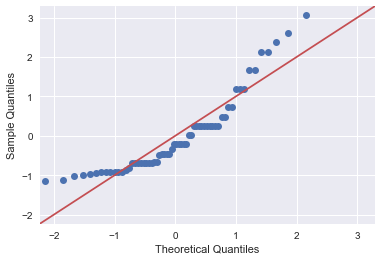

In [1481]:
data_points = df_csmu['Text Messages'].sort_values()
a = np.random.normal(5,5,250)
sm.qqplot(data_points,line='45',fit=True)
# normality test
from scipy.stats import shapiro
stat, p = shapiro(data_points)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.957, p=0.028
Sample does not look Gaussian (reject H0)


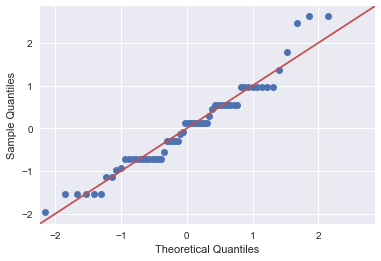

In [1482]:
data_points2 = df_csmu['Salary']

sm.qqplot(data_points2,line="45",fit=True)
# normality test
from scipy.stats import shapiro
stat, p = shapiro(data_points2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.859, p=0.000
Sample does not look Gaussian (reject H0)


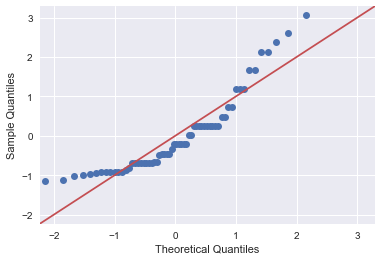

In [1483]:

data_points3 = df_csmu['Text Messages']

sm.qqplot(data_points3,line='45',fit=True)

# normality test
from scipy.stats import shapiro
stat, p = shapiro(data_points3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [1484]:
# normality test
from scipy.stats import shapiro
stat, p = shapiro(data_points3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.859, p=0.000
Sample does not look Gaussian (reject H0)


# 3.1. For the A shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

In [1485]:
df_shingles=pd.read_csv('A & B shingles-1.csv')


In [1486]:
df_shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


# 3.1. For the A shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

In [1487]:
df_shingles['A'].std()

0.13573082605973166

In [1488]:
df_shingles['B'].std()

0.13729647694185443

In [1489]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
group1=df_shingles['A']
group2=df_shingles['B'].dropna()



In [1490]:
t_statistic, p_value=ttest_ind(group1,group2,equal_var=False)

In [1491]:
t_statistic,p_value

(1.2885080295255027, 0.20225822050217818)

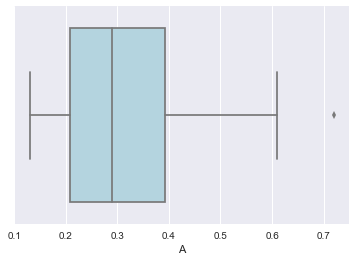

In [1492]:
sns.boxplot((group1), color='lightblue')

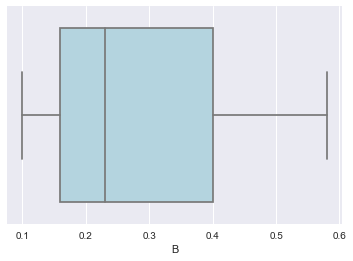

In [1493]:
sns.boxplot(group2, color='lightblue')

In [1494]:
from scipy.stats import shapiro
stat, p = shapiro(group1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.938, p=0.043
Sample does not look Gaussian (reject H0)


In [1495]:
from scipy.stats import shapiro
stat, p = shapiro(group2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.917, p=0.020
Sample does not look Gaussian (reject H0)


In [1505]:
# 3.3 Comparing Variances and standard deviation of two colums A and B

In [1506]:
print("Column A has a variance of ",group1.var()," and standard deviation of ",group1.std()) # Column A

Column A has a variance of  0.018422857142857133  and standard deviation of  0.13573082605973166


In [1507]:
print("Column B has a variance of ",group2.var()," and standard deviation of ",group2.std()) # Column B

Column B has a variance of  0.018850322580645163  and standard deviation of  0.13729647694185443
